# Подготовка

Используем 2 лучших классификатора из прошлых экспериментов экспериментов

- RandomForestClassifier(n_estimators=150), precicion: 0.8608339728830903, recall: 0.801954242135367

- RF + XGBoost stacking, precicion=0.82435319, recall=0.82769304,

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from utils import get_best_threshold

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

from utils import (
    prepare_wallets_features_data,
    get_training_data,
    print_confusion_matrix,
    get_prepared_train_test,
)

In [ ]:
wallets_features = pd.read_csv("../dataset/custom/wallets_features_aggregated.csv")

prep_data = prepare_wallets_features_data(wallets_features, type="raw")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)

In [46]:
wallets_features.shape

(822942, 46)

In [6]:
y_train.value_counts(), y_test.value_counts()

(class
 0    565989
 1     10070
 Name: count, dtype: int64,
 class
 0    242687
 1      4196
 Name: count, dtype: int64)

In [5]:
# prep_data = prepare_wallets_features_data(wallets_features, type="raw")
# X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)

# train_data_raw = pd.read_csv("../dataset/custom/train_test_split/wallets_features_aggregated__train.csv")
# test_data_raw = pd.read_csv("../dataset/custom/train_test_split/wallets_features_aggregated__test.csv")

train_data_raw = pd.read_csv("../dataset/custom/train_test_split/wallets_only/wallets_features_agg__train.csv")
test_data_raw = pd.read_csv("../dataset/custom/train_test_split/wallets_only/wallets_features_agg__test.csv")


In [6]:
X_train, X_test, y_train, y_test = get_prepared_train_test(
    train_data_raw,
    test_data_raw,
    type="raw"
)
y_train.value_counts(), y_test.value_counts()

(class
 0    634653
 1     11576
 Name: count, dtype: int64,
 class
 0    182306
 1      2721
 Name: count, dtype: int64)

# Cost matrix

In [7]:
y_train.value_counts()

class
0    634653
1     11576
Name: count, dtype: int64


        Best threshold: 0.26363157894736844
        Best F1: 0.0806054872280038, precicion: 0.08307332293291732, recall: 0.0782800441014333
        


{'thr': 0.26363157894736844,
 'precicion': 0.08307332293291732,
 'recall': 0.0782800441014333,
 'f1': 0.0806054872280038}

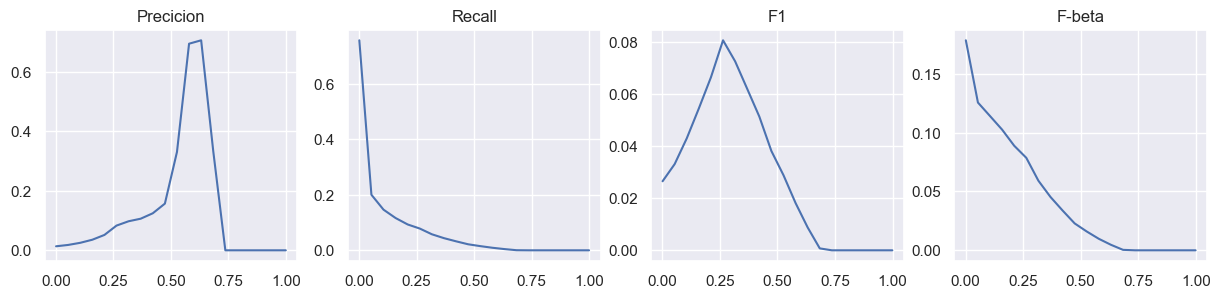

In [8]:
# prep_data = prepare_wallets_features_data(wallets_features, type="full")
# X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(X_train.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 30}))
])
# RandomForestClassifier(min_samples_leaf=
model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [34]:
y_train.value_counts()

class
0    565989
1     10070
Name: count, dtype: int64

In [28]:
y_pred_vals.shape, (y_pred_vals == 1).sum()

((138058,), 537)


        Best threshold: 0.8939473684210526
        Best F1: 0.7525982256020279, precicion: 0.8037357877639415, recall: 0.7075786463298379
        


{'thr': 0.8939473684210526,
 'precicion': 0.8037357877639415,
 'recall': 0.7075786463298379,
 'f1': 0.7525982256020279}

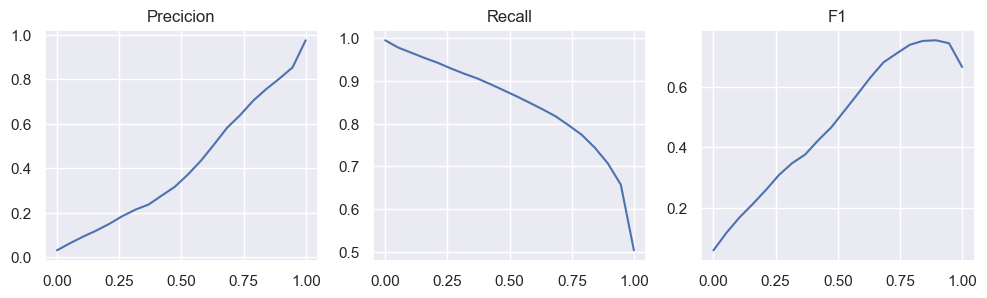

In [35]:
prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 20}))
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.8939473684210526
        Best F1: 0.7525982256020279, precicion: 0.8037357877639415, recall: 0.7075786463298379
        


{'thr': 0.8939473684210526,
 'precicion': 0.8037357877639415,
 'recall': 0.7075786463298379,
 'f1': 0.7525982256020279}

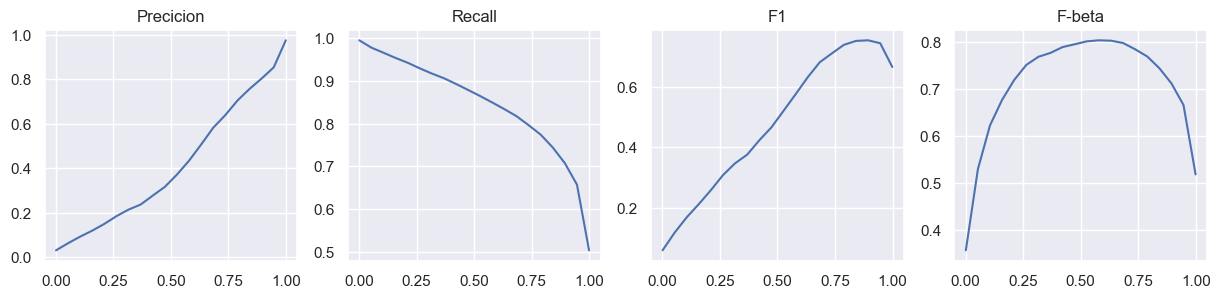

In [39]:
get_best_threshold(y_pred, y_test)


        Best threshold: 0.3686842105263158
        Best F1: 0.8200316802729378, precicion: 0.8389429070057343, recall: 0.801954242135367
        


{'thr': 0.3686842105263158,
 'precicion': 0.8389429070057343,
 'recall': 0.801954242135367,
 'f1': 0.8200316802729378}

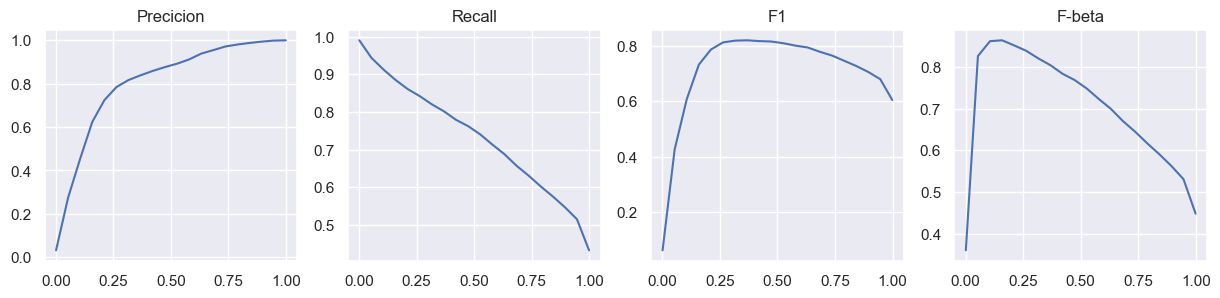

In [96]:
prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 15}))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [ ]:
prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 5}))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.5787894736842105
        Best F1: 0.7963824289405685, precicion: 0.8696388261851016, recall: 0.734509056244042
        


{'thr': 0.5787894736842105,
 'precicion': 0.8696388261851016,
 'recall': 0.734509056244042,
 'f1': 0.7963824289405685}

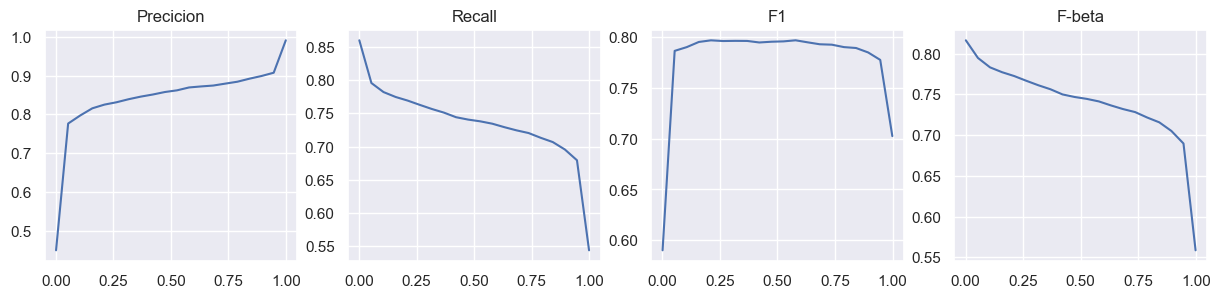

In [92]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
ros = RandomOverSampler(random_state=42,)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 3})),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8, scale_pos_weight=3))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.3161578947368421
        Best F1: 0.7945696721311477, precicion: 0.8588039867109635, recall: 0.7392755004766445
        


{'thr': 0.3161578947368421,
 'precicion': 0.8588039867109635,
 'recall': 0.7392755004766445,
 'f1': 0.7945696721311477}

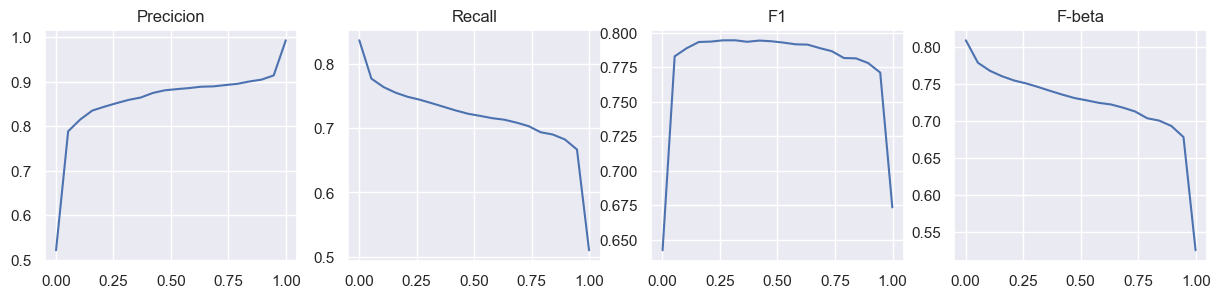

In [93]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
ros = RandomOverSampler(random_state=42,)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 3})),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8, scale_pos_weight=3))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [ ]:
print_confusion_matrix(y_pred, )

## Выводы из class weight

Появилась возможность повысить recall > 90%, но с огромным уменьшением precicion

Лучший результат с высоким precicion был в стекинге RF + XGBoost c 70% precicion и 90% recall